### 미니 프로젝트 요구사항

- 1. 캐글([www.kaggle.com](http://www.kaggle.com))은 인공지능과 데이터 분석에 관심이 있는 전세계 분석가들이 모여서 활동하는 대표적인 커뮤니티입니다. 트럼프 대통령의 트윗 데이터셋([https://www.kaggle.com/datasets/austinreese/trump-tweets](https://www.kaggle.com/datasets/austinreese/trump-tweets))을 다운로드하여 내용을 분석합니다. 
2. Pandas 라이브러리를 이용하여 트럼프 대통령의 트윗 게시글 수의 증감과 트위터 이용자들의 반응을 분석합니다. 
3. Pandas 라이브러리에서 내장된 plot 함수를 활용하여 분석 결과를 시각화하여 표현합니다. 그리고, 비정형 데이터인 트윗 텍스트를 시각화하기 위하여 WordCloud를 생성합니다.

### 진행시 주의사항
- [ ]  캐글 커뮤니티에 가입해서 데이터셋을 다운로드했나요? - 완료 
- [ ]  결측값을 확인하고 분석에 필요한 변수(컬럼)를 추출했나요?
- [ ]  문자열 함수(split, replace)를 활용하여 시간 변수를 추출했나요?
- [ ]  판다스 plot 함수의 사용법을 이해하고 적용했나요?
- [ ]  wordcloud 라이브러리를 설치하고, WordCloud 함수를 불러서 활용했나요?

In [16]:
%pip install wordcloud
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import numpy as np

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [15]:
df = pd.read_csv('./trumptweets.csv')
df.head()

,id,link,content,date,retweets,favorites,mentions,hashtags,geo
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,NaN,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,NaN,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,NaN,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,NaN,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,NaN,NaN,NaN


<AxesSubplot: title={'center': 'bar graph'}, ylabel='Frequency'>

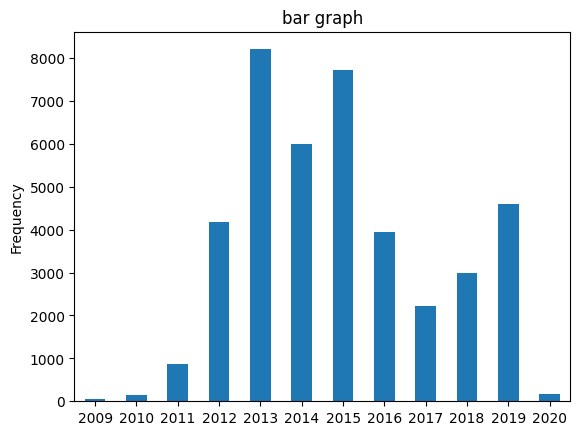

In [101]:
date_df = df['date']

#날짜 요소만 가지고 와서 연/월별로 구분할 예정
date_li = list()
for line in date_df:
    date_li.append(line.strip())

date_year_li = list()
#연 요소만 가지고 오기 
for line in date_li:
    date_year_li.append(line[:4])

date_year_dict = dict()
for date in date_year_li:
    date_year_dict[date] = 0

year_li = list()
freq_li = list()
for key,item in date_year_dict.items():
    freq_li.append(int(date_year_li.count(key)))
    year_li.append(int(key))
 


year_df = pd.Series(freq_li, index = pd.Index(year_li))
year_df.columns=['year', 'freq']
#연도 빈도수 막대그래프로 확인하기
year_df.plot(kind='bar', title= 'bar graph')


year_df.columns


<AxesSubplot: title={'center': 'pie graph'}>

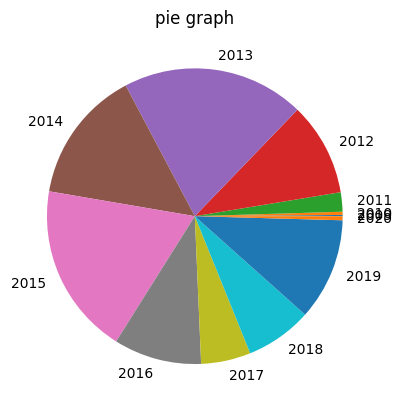

In [119]:
year_df.plot(kind= 'pie', title= 'pie graph')


<AxesSubplot: title={'center': 'line graph'}, xlabel='year', ylabel='frequency'>

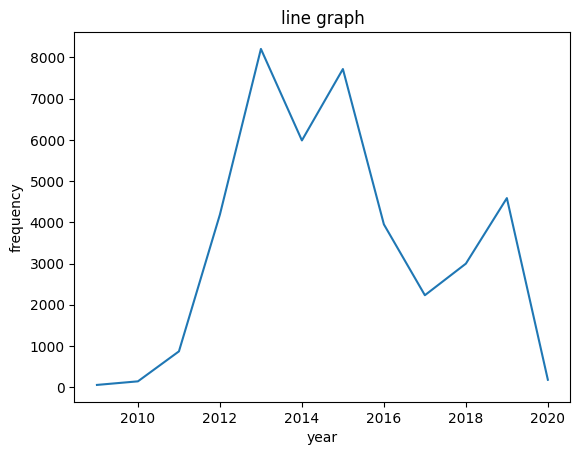

In [121]:
year_df.plot(kind= 'line', title = 'line graph', xlabel = 'year', ylabel = 'frequency')


{'2009': 56, '2010': 143, '2011': 870, '2012': 4190, '2013': 8207, '2014': 5987, '2015': 7719, '2016': 3951, '2017': 2232, '2018': 2998, '2019': 4588, '2020': 181}


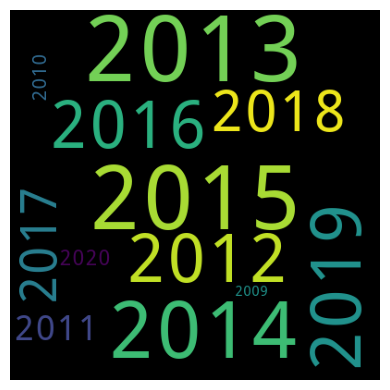

In [110]:
import matplotlib.pyplot as plt
year_freq_dict= dict()
for i in range(len(year_li)):
    year_freq_dict[str(year_li[i])] = freq_li[i]

dict_data = year_freq_dict
print(dict_data)
# WordCloud 생성
from wordcloud import WordCloud, STOPWORDS 

wordcloud = WordCloud(width = 400, height = 400, 
                      background_color ='black', 
                      stopwords = set(STOPWORDS), 
                      max_font_size = 100,
                     ).generate_from_frequencies(dict_data) 
# WordCloud 출력                    
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout() 
plt.show()
 